In [1]:
import numpy as np
import time
import random

In [4]:
B = 18000
N = 100
n_iter = 10000
vec = np.zeros(shape=(B, N))

def roll_vec(vec):
    vec = np.roll(vec, -1, axis=0)
    vec[-1] = 0
    return vec

def vstack_vec(vec):
    return np.vstack((vec[1:], np.zeros((1, N))))

start = time.time()
for i in range(n_iter):
    vec = roll_vec(vec)
end = time.time()
print(f"roll_vec: {(end - start)/n_iter*1e6} microseconds")

start = time.time()
for i in range(n_iter):
    vec = vstack_vec(vec)
end = time.time()
print(f"vstack_vec: {(end - start)/n_iter*1e6} microseconds")

# vec = np.roll(vec, -1, axis=0)
# vec[-1] = 0

roll_vec: 4847.457385063171 microseconds
vstack_vec: 4511.596465110779 microseconds


In [55]:
# class CircularBuffer:
#     """
#     A fast circular buffer implementation using numpy arrays.
#     Optimized version that minimizes array operations and copies.

#     Parameters
#     ----------
#     size : int or tuple
#         Size of the buffer. If tuple, creates a 2D array of shape size.
#         For 1D buffer, pass an integer size.

#     Attributes
#     ----------
#     buffer : ndarray
#         The underlying numpy array storing the data
#     length : int
#         Length of the first dimension of the buffer
#     size : int or tuple
#         Original size parameter used to create the buffer
#     index : int
#         Current position in the circular buffer

#     Methods
#     -------
#     __call__()
#         Returns the buffer contents in chronological order
#     __getitem__(index)
#         Access buffer elements relative to current position
#     __setitem__(index, value) 
#         Set buffer elements relative to current position
#     roll(shift=-1)
#         Rotate buffer position by shift steps
#     step(shift=-1)
#         Rotate buffer and zero the new position
#     """
#     def __init__(self, size):
#         self.buffer = np.zeros(size, dtype=np.int16)
#         self.length = size[0] if isinstance(size, tuple) else size
#         self.size = size
#         self.index = 0
        
#     def __call__(self):
#         if self.index == self.length - 1:
#             return self.buffer
#         result = np.empty_like(self.buffer)
#         np.concatenate((self.buffer[self.index+1:], self.buffer[:self.index+1]), out=result)
#         return result
    
#     def __getitem__(self, index):
#         if isinstance(index, tuple):
#             if isinstance(index[0], slice):
#                 start = 0 if index[0].start is None else index[0].start
#                 stop = self.length if index[0].stop is None else index[0].stop
#                 step = 1 if index[0].step is None else index[0].step
#                 idx = np.mod(np.arange(start, stop, step) + self.index + 1, self.length)
#                 return self.buffer[idx, index[1]]
#             else:
#                 idx = (self.index + index[0] + 1) % self.length
#                 return self.buffer[idx, index[1]]
            
#         return self.buffer[(self.index + index + 1) % self.length]

#     def __setitem__(self, index, value):
#         if isinstance(index, tuple):
#             self.buffer[(self.index + index[0] + 1) % self.length, index[1]] = value
#         else:
#             self.buffer[(self.index + index + 1) % self.length] = value
    
#     def __len__(self):
#         return self.length
    
#     def __repr__(self):
#         return f"CircularBuffer(size={self.size})"

#     def roll(self, shift=-1):
#         self.index = (self.index - shift) % self.length
    
#     def step(self, shift=-1):
#         self.roll(shift)
#         self.buffer[self.index] = 0


# class FastBinner:
#     """
#     A fast binning implementation for neural spike data using circular buffers.
    
#     This class efficiently bins neural spikes into time windows, supporting both
#     single-unit and multi-unit configurations. It uses an optimized CircularBuffer
#     implementation for minimal memory operations.

#     Parameters
#     ----------
#     bin_size : float
#         Size of each time bin in seconds
#     n_id : int
#         Number of neural units to track
#     n_bin : int 
#         Number of time bins to maintain in the buffer
#     i_id : int, optional
#         If specified, only track spikes from this unit ID
#     sampling_rate : int, optional
#         Recording sampling rate in Hz, defaults to 25000

#     Attributes
#     ----------
#     count_vec : CircularBuffer
#         Circular buffer storing spike counts, shape (n_bin, n_id) or (n_bin,)
#     time_to_bin : float
#         Conversion factor from timestamp to bin number
#     last_bin : int
#         Index of the last updated time bin
#     """
#     def __init__(self, bin_size, n_id, n_bin, id=None, sampling_rate=25000):
#         self.bin_size = bin_size
#         self.N = n_id
#         self.B = n_bin
#         self.id = int(id) if id is not None else None
#         buffer_size = (self.B, self.N) if self.id is None else self.B
#         self.count_vec = CircularBuffer(size=buffer_size)
#         self.time_to_bin = 1.0 / (self.bin_size * sampling_rate)
#         self.last_bin = 0
    
#     def input(self, bmi_output):
#         """
#         Process an input spike and update the appropriate bin count.

#         Parameters
#         ----------
#         bmi_output : object
#             Object containing spike timestamp and unit ID information
#         """
#         current_bin = int(bmi_output.timestamp * self.time_to_bin)
#         spk_id = int(bmi_output.spk_id)
        
#         if current_bin != self.last_bin:
#             self.count_vec.step()
#             self.last_bin = current_bin
            
#         if self.id is None:
#             self.count_vec[-1, spk_id] += 1
#         elif self.id == spk_id:
#             self.count_vec[-1] += 1
    
#     def output(self):
#         """
#         Get the current state of all bins.

#         Returns
#         -------
#         ndarray
#             Array of spike counts across all bins
#         """
#         return self.count_vec()

class BMIoutput:
    def __init__(self, n_units=10, fs=25000):
        self.n_units = n_units
        self.timestamp = 0
        self.fs = fs

    def __call__(self):
        cur_min = self.timestamp/self.fs / 60 * 10 + 10 # from 10 Hz to 20 Hz
        self.timestamp += int(random.gammavariate(50/cur_min, 1/50)*self.fs)
        self.spk_id = 1
        return self

# B = 180
# N = 10
# n_iter = 1000000
# buf = CircularBuffer(size=B)

# start = time.time()
# for i in range(n_iter):
#     buf.step()
# end = time.time()
# print(f"step: {(end - start)/n_iter*1e9} nanoseconds")

[ 10.6  12.2  13.5  15.7  17.3  20.4  21.   21.8  24.7  26.8  28.8  28.1
  30.7  31.9  34.7  32.7  43.1  39.5  41.5  43.6  46.8  44.7  46.5  51.6
  52.6  50.1  54.7  53.7  52.4  57.6  61.8  62.4  66.7  65.1  67.9  69.6
  69.4  77.8  73.4  80.8  82.3  80.8  80.   83.9  81.9  87.7  93.1  88.7
  96.5  95.4  99.8  92.4  98.2  93.2 101.4 104.2 112.5 104.9 106. ]


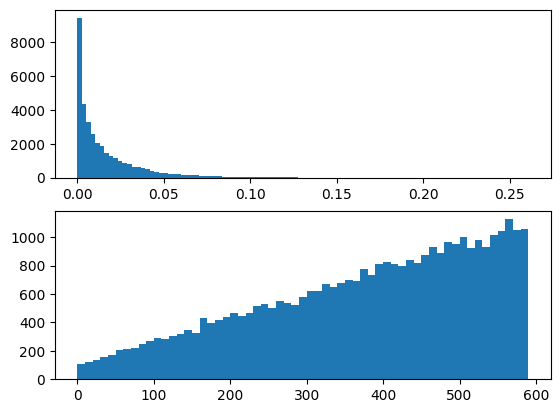

In [59]:
import matplotlib.pyplot as plt

bmi = BMIoutput()

n_iter = 100000
spikes = []
for i in range(n_iter):
    bmi_output = bmi()
    if bmi_output.timestamp > 25000*60*10:
        break
    spikes.append(bmi_output.timestamp / 25000)

iti = np.diff(spikes)
plt.subplot(211)
plt.hist(iti, bins=100)
plt.subplot(212)
y, _, _ = plt.hist(spikes, bins=np.arange(0, 600, 10))
y = np.array(y) / 10
print(y)




In [2]:
# Loading from nctrl.utils

from nctrl.utils import FastBinner

In [60]:
N = 10
B = 600
n_iter = 10000

binner = FastBinner(bin_size=0.1, n_id=N+1, n_bin=B, id=1)
bmi = BMIoutput(n_units=N)

start = time.time()
for i in range(n_iter):
    bmi_output = bmi()
    if bmi_output.timestamp > 25000*59:
        break

    binner.input(bmi_output)
    
    if i % 50 == 0:
        print(bmi_output.timestamp/25000)
        print(binner.output)


end = time.time()
print(f"input: {(end - start)/i*1e6} microseconds")

print(bmi_output.timestamp/25000)
print(binner.output)


0.12756
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

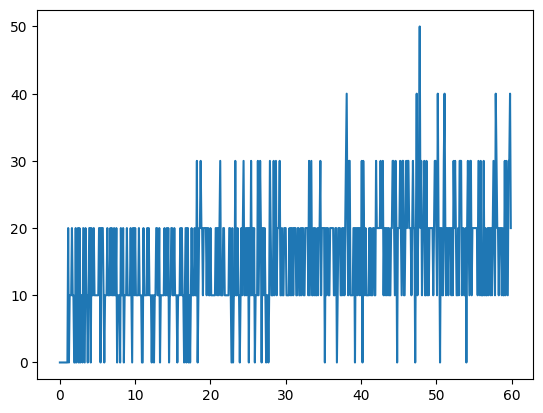

In [63]:
t = np.arange(0, 60, 0.1)
plt.plot(t, binner.output / 0.1)

In [107]:
buf[-1] = np.random.randint(0, 10, size=(N,))
buf.step()
buf[-1] = np.random.randint(0, 100, size=(N,))
buf.step()
buf[-1] = np.random.randint(0, 1000, size=(N,))

ValueError: setting an array element with a sequence.

In [12]:
# check binner
print(binner.count_vec.buffer)
print(binner.count_vec.buffer.shape)
print(binner.count_vec.index)
print(binner.count_vec())

[ 55  56  58  36  51  56  91  29  62  56  48  72  74  51  50  55  73  66
 104  69  97 113 108  91 102  86  89 119 126  54 116  89  60 107  97 130
 141 100  81 111  93 125  95  95 109  50 130 141 128  82 166  84 105  99
 151 132 175  75 218 103 159 135  96 195 171 208  97 200 176 138 131 193
 184 291 164 236 175 329 201  93 182 140 209 102 214 131 163 189 290 151
 273 218 180 171  67 143 198 231 275 262 127 199 221 202 269 223 205 166
 155  96 196 192 162 308 226 162 274 230 192 159 158 241 186 437 105 215
 346 440 288 192 330 400 168 342 341 166 226 219 329 302 199 178 233 221
 334 305 342 357 359 223 266 386 238 362 251 318 554 354 221 280 358 383
 189 303 238 228 176 373 244 184 258 298 454 325 265 391 439 425 194 265]
(180,)
179
[ 55  56  58  36  51  56  91  29  62  56  48  72  74  51  50  55  73  66
 104  69  97 113 108  91 102  86  89 119 126  54 116  89  60 107  97 130
 141 100  81 111  93 125  95  95 109  50 130 141 128  82 166  84 105  99
 151 132 175  75 218 103 159 135  96 19

In [13]:
x = binner.count_vec()
print(x.shape)
print(x)

(180,)
[ 55  56  58  36  51  56  91  29  62  56  48  72  74  51  50  55  73  66
 104  69  97 113 108  91 102  86  89 119 126  54 116  89  60 107  97 130
 141 100  81 111  93 125  95  95 109  50 130 141 128  82 166  84 105  99
 151 132 175  75 218 103 159 135  96 195 171 208  97 200 176 138 131 193
 184 291 164 236 175 329 201  93 182 140 209 102 214 131 163 189 290 151
 273 218 180 171  67 143 198 231 275 262 127 199 221 202 269 223 205 166
 155  96 196 192 162 308 226 162 274 230 192 159 158 241 186 437 105 215
 346 440 288 192 330 400 168 342 341 166 226 219 329 302 199 178 233 221
 334 305 342 357 359 223 266 386 238 362 251 318 554 354 221 280 358 383
 189 303 238 228 176 373 244 184 258 298 454 325 265 391 439 425 194 265]


In [14]:
x[0]

55

In [20]:
binner.input(bmi_output)
print(binner.count_vec.buffer)
print(binner.count_vec.buffer.shape)
print(binner.count_vec.index)
print(binner.count_vec())
print(binner.output)

[  2  56  58  36  51  56  91  29  62  56  48  72  74  51  50  55  73  66
 104  69  97 113 108  91 102  86  89 119 126  54 116  89  60 107  97 130
 141 100  81 111  93 125  95  95 109  50 130 141 128  82 166  84 105  99
 151 132 175  75 218 103 159 135  96 195 171 208  97 200 176 138 131 193
 184 291 164 236 175 329 201  93 182 140 209 102 214 131 163 189 290 151
 273 218 180 171  67 143 198 231 275 262 127 199 221 202 269 223 205 166
 155  96 196 192 162 308 226 162 274 230 192 159 158 241 186 437 105 215
 346 440 288 192 330 400 168 342 341 166 226 219 329 302 199 178 233 221
 334 305 342 357 359 223 266 386 238 362 251 318 554 354 221 280 358 383
 189 303 238 228 176 373 244 184 258 298 454 325 265 391 439 425 194 265]
(180,)
0
[ 56  58  36  51  56  91  29  62  56  48  72  74  51  50  55  73  66 104
  69  97 113 108  91 102  86  89 119 126  54 116  89  60 107  97 130 141
 100  81 111  93 125  95  95 109  50 130 141 128  82 166  84 105  99 151
 132 175  75 218 103 159 135  96 195 171 

In [73]:
bmi_output = bmi()
binner.input(bmi_output)
x = binner.count_vec.buffer
print(x)
# print(binner.count_vec.buffer.shape)
# print(binner.count_vec.index)
# print(binner.count_vec())
# print(binner.output)

[0 2 0 1 1 1 2 1 1 0 0 2 0 1 2 0 2 0 1 1 0 2 1 0 2 1 1 0 1 2 2 0 2 1 1 2 1
 1 1 1 1 1 2 2 0 2 2 2 1 0 1 1 1 2 1 1 1 2 1 2 1 1 2 1 1 2 0 1 1 1 0 2 1 1
 2 0 1 1 1 2 1 1 1 1 2 1 0 2 2 1 2 1 1 1 1 2 1 1 1 0 0 2 1 1 1 1 2 1 2 1 1
 1 0 1 1 0 1 1 2 2 1 1 2 0 1 1 1 1 1 2 1 1 2 1 2 0 1 1 2 2 1 1 2 1 1 1 0 1
 1 1 2 1 2 1 1 0 1 2 0 2 2 0 1 0 1 2 1 1 1 2 1 1 3 0 1 2 2 3 2 2 1 2 2 2 2
 1 2 2 1 1 2 1 1 1 1 1 1 2 2 1 2 1 2 3 1 1 1 2 2 1 1 1 1 1 1 2 2 1 0 2 0 1
 1 3 1 1 2 1 1 0 1 2 1 2 3 1 1 2 1 2 2 0 2 1 3 1 2 1 2 0 1 1 1 3 1 2 3 2 0
 2 2 1 2 1 0 1 1 0 1 3 2 1 1 1 3 1 2 3 1 2 2 2 3 1 1 2 1 1 2 2 2 1 1 1 1 2
 1 2 1 2 1 2 2 2 1 1 2 2 1 1 2 1 2 2 1 1 2 2 2 2 1 3 1 2 3 1 1 2 1 2 1 1 2
 1 2 2 3 1 2 2 2 2 0 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 0 1 2 2 2 1 1 2 1 2 1 2
 3 4 2 1 3 3 1 1 1 1 2 2 0 2 2 1 2 2 1 2 1 3 0 3 2 1 2 1 1 1 1 2 1 2 1 1 2
 2 1 1 3 2 2 2 2 2 3 2 2 3 1 2 1 2 1 2 1 2 1 1 2 2 3 3 2 1 3 2 0 2 2 2 3 2
 1 3 3 1 1 2 3 2 3 3 2 2 2 1 2 3 2 2 0 2 4 1 2 3 5 2 3 1 2 2 3 1 1 3 1 2 1
 2 2 2 2 2 1 2 3 3 2 1 4 

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [69]:
import numpy as np

over_threshold = np.random.randint(0, 10, size=(100,)) > 5
transitions = np.logical_xor(over_threshold[1:], over_threshold[:-1])
print(transitions)
block_start = np.nonzero(~over_threshold[:-1] & transitions)[0]
block_end = np.nonzero(over_threshold[:-1] & transitions)[0]
print(block_start)
print(block_end)
block_durations = block_end - block_start
fire_count = np.sum(np.ceil(block_durations / 10))
print(fire_count)

[False  True False False False  True False  True False False False False
  True  True False False False False  True False  True False False  True
 False  True False False False False False False False False False  True
 False False  True False False  True  True False  True False False  True
 False  True  True False False  True False False  True False False  True
  True  True  True  True  True False False  True False False  True False
 False False False False False False False False False False False False
  True  True False False  True  True False False False  True  True False
 False False False]
[ 5 12 18 23 35 41 44 49 53 59 61 63 67 84 88 93]
[ 1  7 13 20 25 38 42 47 50 56 60 62 64 70 85 89 94]


ValueError: operands could not be broadcast together with shapes (17,) (16,) 